# SUMMARY
In this notebook we again look at the relationship between 

In [969]:
from datetime import date

import pandas as pd
import numpy as np

from matplotlib.pylab import plt

import seaborn as sns

sns.set_style("white")
sns.set_context('talk')

%matplotlib inline

# Setup

In [970]:
# Params

dataset = '../data/processed/010_ecdc_dataset.csv'
graphs_dir = '../graphs/'

highlight_countries = [
    'Ireland', 'United_Kingdom', 'Italy', 'France', 'Spain', 'Germany', 
    'United_States_of_America', 'Japan', 'Singapore', 'South_Korea', 'China',
    'Iran', 'Sweden', 'Denmark', 'Qatar', 'Kuwait', 
    'Cases_on_an_international_conveyance_Japan'
    
]

## Load the Processed DataSet

In [971]:
df = pd.read_csv(dataset)

df.head()


,country,date,day,num_cases,num_deaths,id,code,pop,total_cases,total_deaths,log10_total_cases,log10_total_deaths,dt_total_cases,dt_total_deaths,day_zero_cases,day_zero_deaths
0,Afghanistan,2019-12-31,0,0,0,AF,AFG,37172386.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-01,1,0,0,AF,AFG,37172386.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-02,2,0,0,AF,AFG,37172386.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-03,3,0,0,AF,AFG,37172386.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-04,4,0,0,AF,AFG,37172386.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Colours

In [972]:
# One of Matplotlib's standard colour maps.
colours = plt.cm.tab20(np.linspace(0,1,20))
highlight_colour_dict = dict(zip(highlight_countries, colours))



# New vs Total Cases

In [973]:
def plot_simple_new_vs_total_cases(
    ax, df, new_col, total_col, day_zero_col, w, **kwargs):
    
    # Is there day_zero data?
    df = df[df[day_zero_col]>=0]
    
    if len(df)>w: 
        x, y = df[total_col], df[new_col].rolling(w, min_periods=2).mean()

        ax.plot(x, y, **kwargs)




def plot_annotated_new_vs_total_cases(
    ax, df, new_col, total_col, day_zero_col, country, w, markers=True, **kwargs):
    
    
    # Is there day_zero data?
    df = df[df[day_zero_col]>=0]
        
    if len(df)>w: 

        x, y = df[total_col], df[new_col].rolling(w, min_periods=2).mean()
        
        ax.plot(x, y, **kwargs)
        ax.plot(x[-1:], y[-1:], lw=0, marker='o', markersize=9, c=kwargs['c'], markeredgecolor='k')


        if markers==True: 
            ax.plot(x, y, lw=0, marker='o', markersize=2, c=kwargs['c'])
            
            short_name = country.replace('_', ' ').title() if len(country.split('_'))<3 else ''.join([word[0] for word in country.split('_') if word[0].isupper()])
            x_offset = x.iloc[-2]/10
            y_offset = y.iloc[-1]-y.iloc[-2]
            ax.annotate(short_name, xy=(x.iloc[-1]+x_offset, max(y.iloc[-1]+y_offset, 1)), fontsize=12, color='k')
            






In [974]:
def plot_new_vs_total_cases(
    ax, df, 
    new_col, total_col, day_zero_col, 
    highlight_countries, colour_dict, 
    w=5, **kwargs):
    
    # Plot the background graphs for all countries beyond day-zero
    df.groupby('country').apply(
        lambda g: plot_simple_new_vs_total_cases(
            ax, g, new_col, total_col, day_zero_col, w, c='gainsboro', lw=2)
    )
    
    # Plot the highlighted countries
    df[df['country'].isin(highlight_countries)].groupby('country').apply(
        lambda g: plot_annotated_new_vs_total_cases(
            ax, g, new_col, total_col, day_zero_col, g.name, w, 
            c=colour_dict[g.name], lw=.75, marker='o', markersize=10, markerfacecolor='none', markeredgewidth=.5
        )
    )
    
    ax.set_xscale('log')
    ax.set_yscale('log')

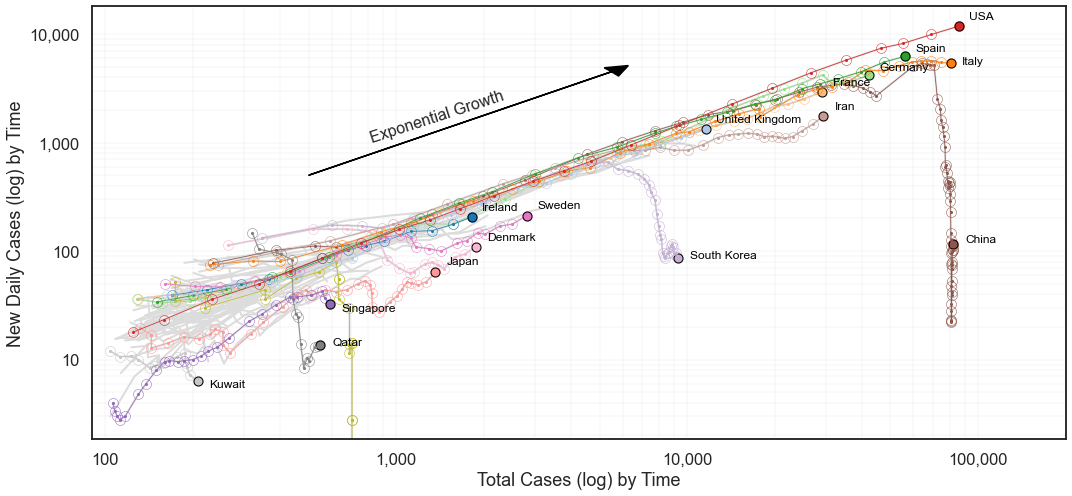

In [975]:
fig, ax = plt.subplots(figsize=(15, 7))

plot_new_vs_total_cases(
    ax, df, 
    'num_cases', 'total_cases', 'day_zero_cases', 
    highlight_countries, highlight_colour_dict, 
    w=5
)

ax.grid(b='both', which='both', lw=.1, c='darkgrey')

ax.set_xlabel('Total Cases (log) by Time')
ax.set_ylabel('New Daily Cases (log) by Time')

ax.set_xlim(90, 200000)
ax.set_xticks([100, 1000, 10000, 100000])
ax.set_yticks([10, 100, 1000, 10000])

ax.set_xticklabels(['100', '1,000', '10,000', '100,000'])
ax.set_yticklabels(['10', '100', '1,000', '10,000'])

ax.arrow(500, 500, 5000, 4000, head_width=1000, head_length=1000, fc='k', ec='k')
ax.annotate('Exponential Growth', xy=(800, 1000), rotation=18, fontsize=16)

fig.tight_layout()

In [976]:
fig.savefig(graphs_dir+'new_cases_by_total_cases_for_countries.png', format='png', dpi=200)

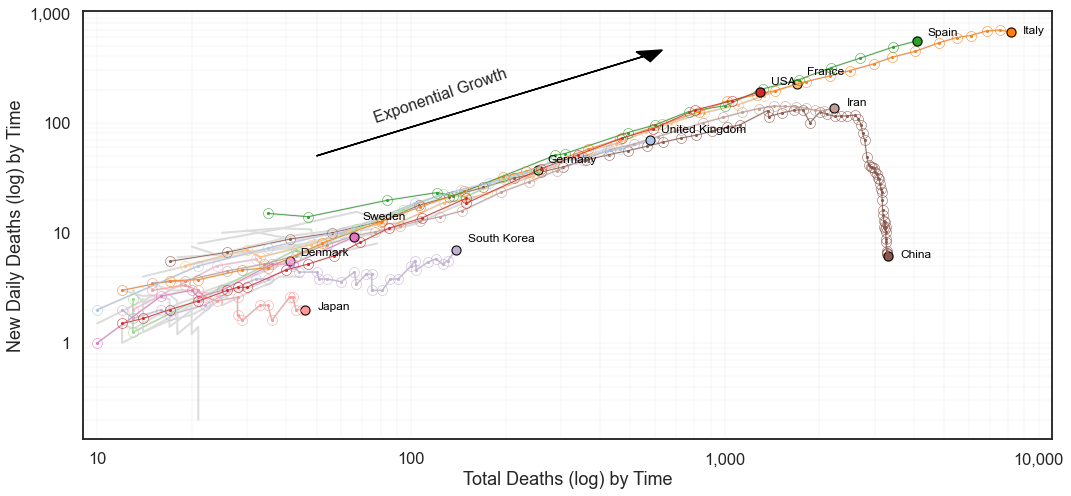

In [977]:
fig, ax = plt.subplots(figsize=(15, 7))

plot_new_vs_total_cases(
    ax, df, 
    'num_deaths', 'total_deaths', 'day_zero_deaths', 
    highlight_countries, highlight_colour_dict, 
    w=5
)

ax.grid(b='both', which='both', lw=.1, c='darkgrey')

ax.set_xlabel('Total Deaths (log) by Time')
ax.set_ylabel('New Daily Deaths (log) by Time')

ax.set_xlim(9, 11000)
ax.set_xticks([10, 100, 1000, 10000])
ax.set_yticks([1, 10, 100, 1000])

ax.set_xticklabels(['10', '100', '1,000', '10,000'])
ax.set_yticklabels(['1', '10', '100', '1,000'])

ax.arrow(50, 50, 500, 350, head_width=100, head_length=100, fc='k', ec='k')
ax.annotate('Exponential Growth', xy=(75, 100), rotation=19, fontsize=16)

fig.tight_layout()

In [978]:
fig.savefig(graphs_dir+'new_deaths_by_total_deaths_for_countries.png', format='png', dpi=200)

In [979]:
def plot_countries_grid(countries, new_col, total_col, day_zero_col, w=5, graph_size=2.5, ncols=6, xlim=(100, 100000)):
    
    nrows = 1+len(countries)//ncols if len(countries)%ncols>0 else len(countries)//ncols

    fig, axs = plt.subplots(figsize=(ncols*graph_size, nrows*graph_size), nrows=nrows, ncols=ncols, sharex=True, sharey=True)

    flattened_axs = axs.flatten()

    for country, ax in zip(countries, flattened_axs):

        # Plot all countries in grey as a background against the current country.
        df.groupby('country').apply(
            lambda g: plot_simple_new_vs_total_cases(ax, g, new_col, total_col, day_zero_col, w, c='gainsboro', lw=2)
        )
        
        df[df['country']==country].groupby('country').apply(
            lambda g: plot_annotated_new_vs_total_cases(
                ax, g, new_col, total_col, day_zero_col, g.name, w, markers=False,
                c='maroon', lw=2
            )
        )
                
        ax.set_title(country.replace('_', ' ').title()[:25], fontsize=13)
        ax.set_xscale('log')
        ax.set_yscale('log')
    
    # Remove frames/axes from empty graphs
    empty_frames = len(countries)-len(flattened_axs)
    if empty_frames<0: 
        for ax in flattened_axs[empty_frames:]: ax.axis('off')
    
    return fig, axs





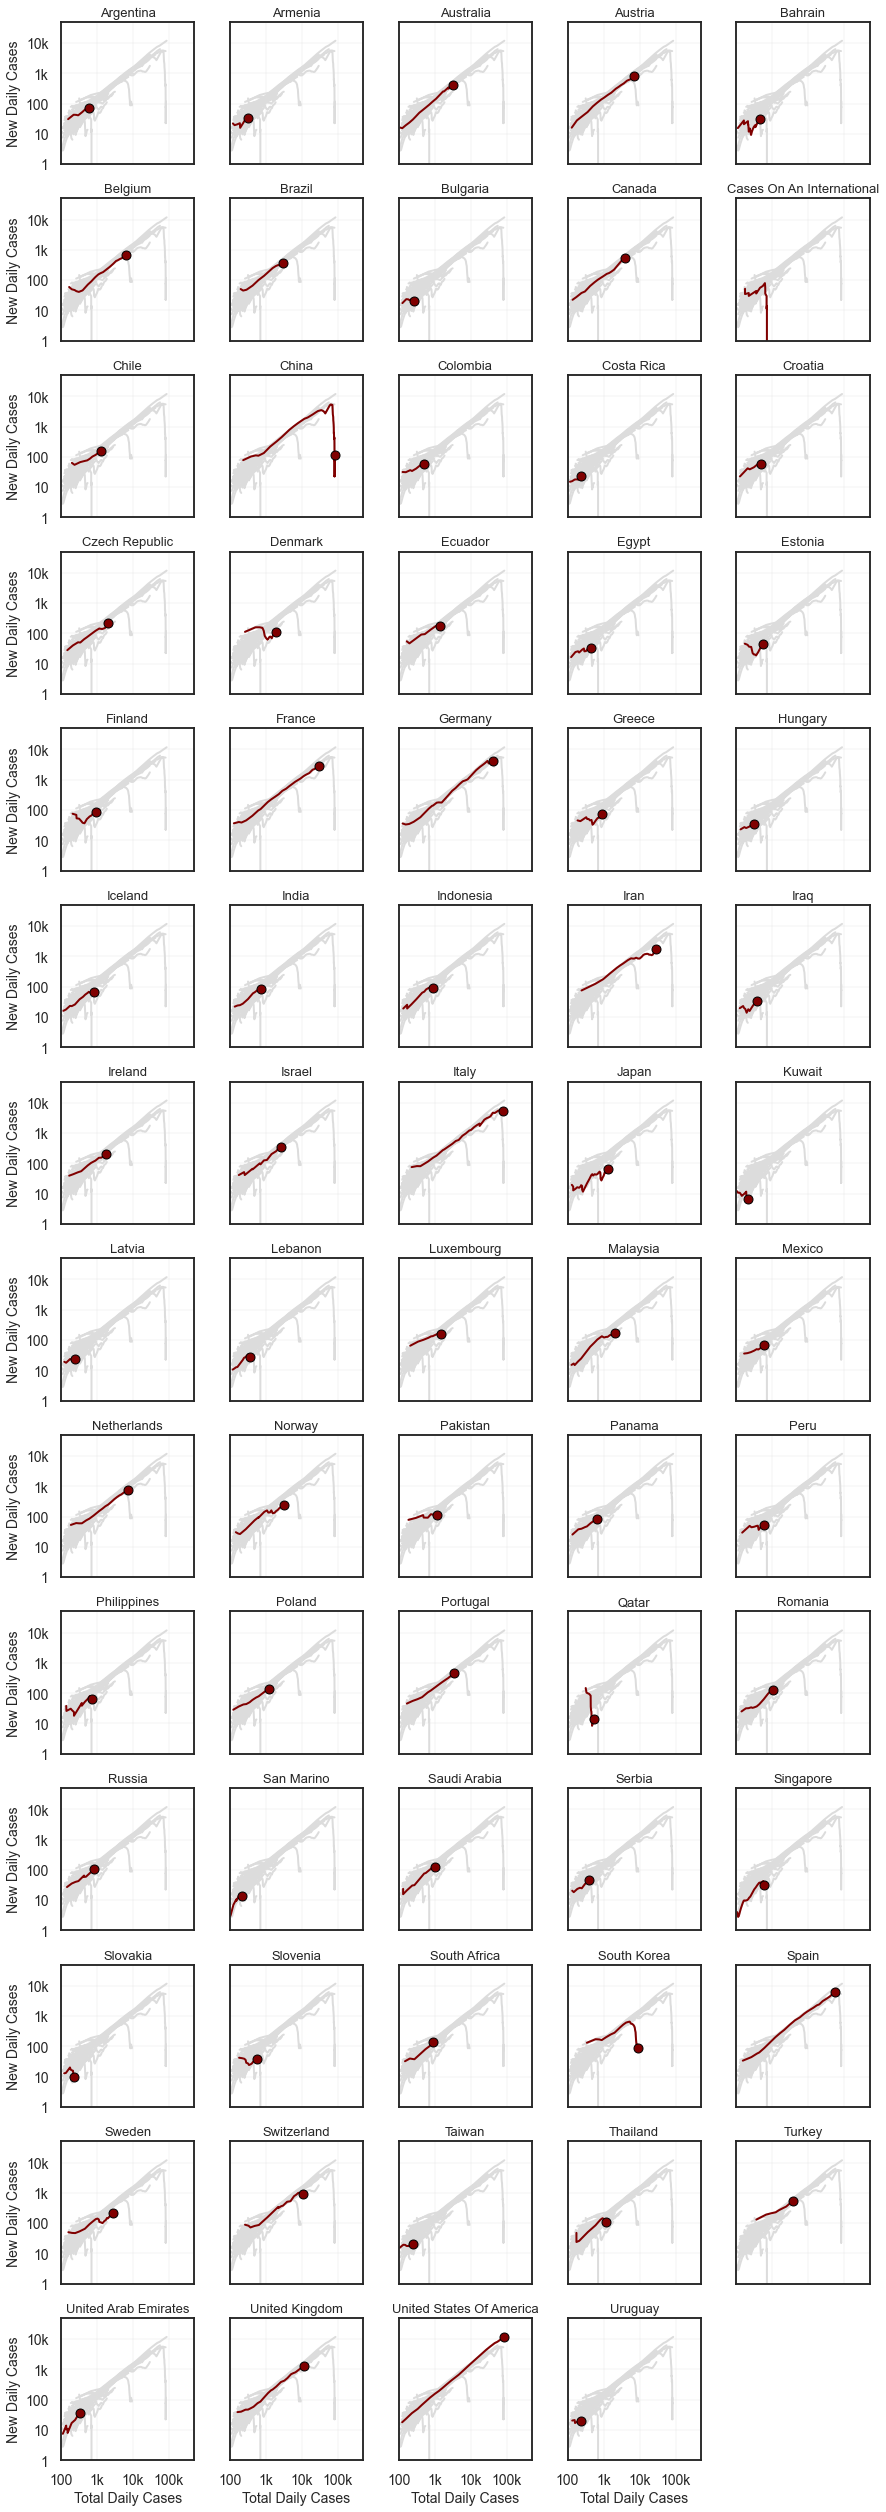

In [980]:
# We neeed to focus on countries with >w day-zero cases days
w=5
day_zero_cases_days = df.groupby('country').apply(lambda g: len(g[g['day_zero_cases']>w])>0)
countries_with_w_day_zero_cases_days = day_zero_cases_days[day_zero_cases_days].index.values

fig, axs = plot_countries_grid(
    countries_with_w_day_zero_cases_days, 
    'num_cases', 'total_cases', 'day_zero_cases',
    graph_size=2.5, ncols=5
);

# Clean up the axes
for ax in axs.flatten():
    ax.set_xlim(100, 500000)
    ax.set_ylim(1, 50000)
    ax.grid(b='both', which='both', lw=.2)
    
for row in range(axs.shape[0]): 
    ax = axs[row][0]
    ax.set_ylabel('New Daily Cases', fontsize=14)
    ax.set_yticks([1, 10, 100, 1000, 10000])
    ax.set_yticklabels(['1', '10', '100', '1k', '10k'], fontsize=14)
    
for col in range(axs.shape[1]):
    ax = axs[axs.shape[0]-1][col]
    ax.set_xlabel('Total Daily Cases', fontsize=14)
    ax.set_xticks([100, 1000, 10000, 100000])
    ax.set_xticklabels(['100', '1k', '10k', '100k'], fontsize=14)


fig.tight_layout()

In [981]:
fig.savefig(graphs_dir+'grid_new_cases_by_total_cases_for_countries.png', format='png', dpi=200)

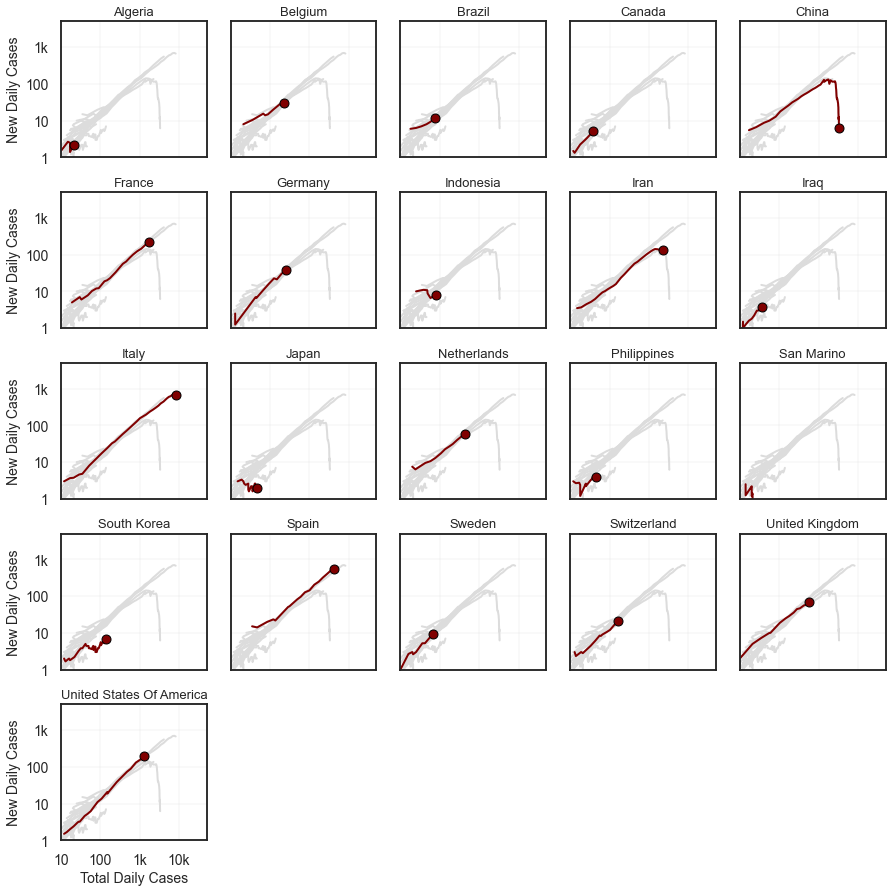

In [982]:
# We neeed to focus on countries with >w day-zero death days

w=5
day_zero_death_days = df.groupby('country').apply(lambda g: len(g[g['day_zero_deaths']>w])>0)

countries_with_w_day_zero_death_days = day_zero_days[day_zero_death_days].index.values
len(countries_with_w_day_zero_death_days)

fig, axs = plot_countries_grid(
    countries_with_w_day_zero_death_days, 
    'num_deaths', 'total_deaths', 'day_zero_deaths',
    graph_size=2.5, ncols=5, 
);


# Clean up the axes
for ax in axs.flatten():
    ax.set_xlim(10, 50000)
    ax.set_ylim(1, 5000)
    ax.grid(b='both', which='both', lw=.2)
    
for row in range(axs.shape[0]): 
    ax = axs[row][0]
    ax.set_ylabel('New Daily Cases', fontsize=14)
    ax.set_yticks([1, 10, 100, 1000])
    ax.set_yticklabels(['1', '10', '100', '1k'], fontsize=14)
    
for col in range(axs.shape[1]):
    ax = axs[axs.shape[0]-1][col]
    ax.set_xlabel('Total Daily Cases', fontsize=14)
    ax.set_xticks([10, 100, 1000, 10000])
    ax.set_xticklabels(['10', '100', '1k', '10k'], fontsize=14)


fig.tight_layout()

In [983]:
fig.savefig(graphs_dir+'grid_new_deaths_by_total_deaths_for_countries.png', format='png', dpi=200)